0 22.099517481141493, [9.03543993], [61.23687955]
1000 2.8822524153583036, [2.33525691], [78.78960186]
2000 2.880972074227748, [2.30012482], [78.99925515]
3000 2.8809720581777873, [2.30000044], [78.99999736]
4000 2.8809720581775893, [2.3], [78.99999999]
5000 2.8809720581775866, [2.3], [79.]


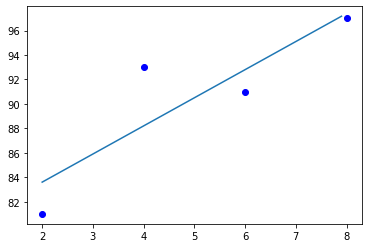

In [18]:
##################################
# sqrt = 루트
# mean = 평균
# square = 제곱

##################################
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

a = tf.Variable(tf.random.uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype = tf.float64, seed = 0))

def hypothesis(a,b): # 가설
    return a * x + b

def costFunc(): #minimize 사용손실 함수 
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a,b) - y))) 

def cost(a,b):  #손실계산 함수
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a,b) - y))) 

opt = tf.keras.optimizers.SGD(learning_rate= 0.1)

for i in range(5001):
    opt.minimize(costFunc, var_list=[a,b])
    if i % 1000 == 0:
        print(i, f'{cost(a,b)}, {a.numpy()}, {b.numpy()}')

line_x = np.arange(min(x), max(x),0.1)
line_y = a.numpy() * line_x + b.numpy()
plt.plot(line_x, line_y)
plt.plot(x, y, 'bo')
plt.show()

0 36.04250338660649, [1.31976364], [48.04092897]
1000 2.9208394035601972, [2.49739509], [77.82203054]
2000 2.8809725681541347, [2.30070357], [78.99580141]
3000 2.880972058183979, [2.30000249], [78.99998514]
4000 2.880972058177586, [2.30000001], [78.99999995]
5000 2.880972058177584, [2.3], [79.]


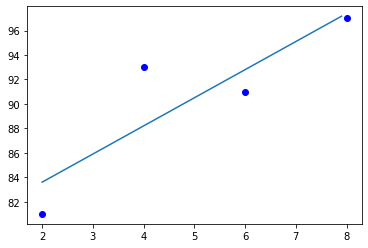

In [26]:
import tensorflow as tf
######################################
#tenserboard로 추가
from datetime import datetime
#######################################
import numpy as np
import matplotlib.pyplot as plt

data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

a = tf.Variable(tf.random.uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype = tf.float64, seed = 0))

def hypothesis(a,b): # 가설
    return a * x + b
#################################
#tenserboard로 추가
@tf.function
##############################
def costFunc(): #minimize 사용손실 함수
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a,b) - y))) 

def cost(a,b):  #손실계산 함수
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a,b) - y))) 
#######################################
#tenserboard로 추가
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/mylogs/%s'%stamp
writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True, profiler=True)
costFunc()
with writer.as_default() :
    tf.summary.trace_export(name='graph_t1', step=0, profiler_outdir=logdir)
###################################3
opt = tf.keras.optimizers.SGD(learning_rate= 0.1)

for i in range(5001):
    opt.minimize(costFunc, var_list=[a,b])
    if i % 1000 == 0:
        print(i, f'{cost(a,b)}, {a.numpy()}, {b.numpy()}')

line_x = np.arange(min(x), max(x),0.1)
line_y = a.numpy() * line_x + b.numpy()
plt.plot(line_x, line_y)
plt.plot(x, y, 'bo')
plt.show()

In [25]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = np.array([i[0] for i in data], dtype='f')
x2 = np.array([i[1] for i in data], dtype='f')
y = np.array([i[2] for i in data], dtype='f')

ab = [1.2301,2.1633,77.8117]
a1b1 = [2.3,79]
y2 = ab[0] * x1 + ab[1] * x2 + ab[2]
print('다중선형 점수평균 : ', y2.mean())
diff_y2 = abs(y - y2)
print('다중선형 평균오차 : ', diff_y2.mean())

y3 = a1b1[0] * x1 + a1b1[1] 
print('다중선형 점수평균 : ', y3.mean())
diff_y3 = abs(y - y3)
print('다중선형 평균오차 : ', diff_y3.mean())

다중선형 점수평균 :  88.82962
다중선형 평균오차 :  1.6703777
다중선형 점수평균 :  90.49999
다중선형 평균오차 :  2.4000015


In [34]:
#tenserboard로 추가
from datetime import datetime

data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

a1 = tf.Variable(tf.random.uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random.uniform([1], 0, 10, dtype = tf.float64, seed = 0))
a2 = tf.Variable(tf.random.uniform([1], 0, 100, dtype = tf.float64, seed = 0))

def hypothesis(a1,a2,b): # 가설
    return a1 * x1 + a2 * x2 + b

#tenserboard로 추가
@tf.function

def costFunc(): #minimize 사용손실 함수
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a1,a2,b) - y))) 

def cost(a1,a2,b):  #손실계산 함수
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a1,a2,b) - y))) 

#tenserboard로 추가
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/mylogs/%s'%stamp
writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True, profiler=True)
costFunc()
with writer.as_default() :
    tf.summary.trace_export(name='graph_t2', step=0, profiler_outdir=logdir)
    
opt = tf.keras.optimizers.SGD(learning_rate= 0.1)

for i in range(8001):
    opt.minimize(costFunc, var_list=[a1,a2,b])
    if i % 1000 == 0:
        print(i, f'{cost(a1,a2,b)}, {a1.numpy()}, {a2.numpy()}, {b.numpy()}')
  

0 76.75723539055376, [2.96113953], [47.41673242], [3.56976143]
1000 16.356652368659322, [7.31995787], [4.52629998], [37.27499856]
2000 1.835495732446918, [2.00893369], [2.48824766], [76.10258793]
3000 1.8370060496498515, [1.76994386], [2.40817717], [77.90230257]
4000 1.83700604968686, [1.76989909], [2.40816171], [77.90260997]
5000 1.837006049686874, [1.76989908], [2.40816171], [77.90261003]
6000 1.8370060496868776, [1.76989908], [2.40816171], [77.90261003]
7000 1.8370060496868776, [1.76989908], [2.40816171], [77.90261003]
8000 1.8370060496868776, [1.76989908], [2.40816171], [77.90261003]
